<a href="https://colab.research.google.com/github/Anuj7953/Image_Recoginition_Machine_Learning-Cats-vs-Dogs/blob/main/Image_Recoginition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ TensorFlow Version: 2.19.0
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5366 - loss: 0.6964 - val_accuracy: 0.6380 - val_loss: 0.6448
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5880 - loss: 0.6626 - val_accuracy: 0.6470 - val_loss: 0.6538
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6201 - loss: 0.6565 - val_accuracy: 0.6530 - val_loss: 0.6250
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6152 - loss: 0.6457 - val_accuracy: 0.6680 - val_loss: 0.6163
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6369 - loss: 0.6392 - val_accuracy: 0.6810 - val_loss: 0.6034


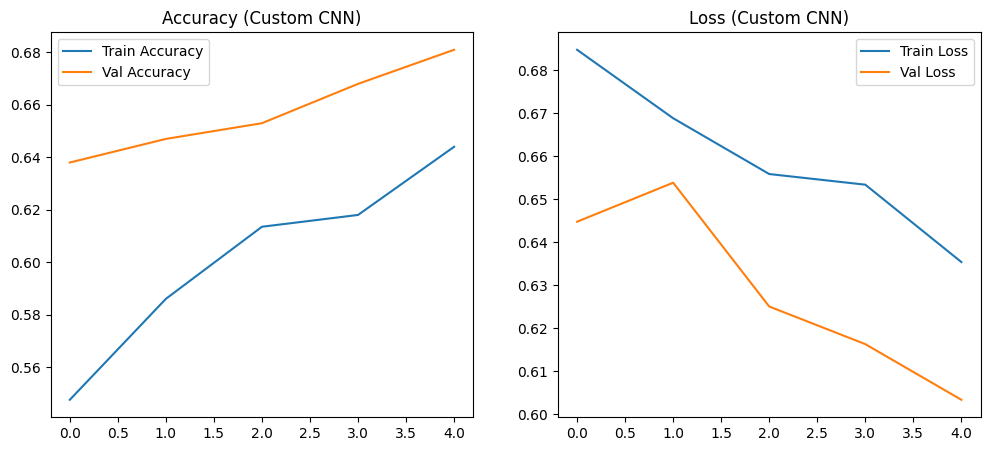

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 637ms/step - accuracy: 0.8281 - loss: 0.3718 - val_accuracy: 0.9620 - val_loss: 0.1133
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 602ms/step - accuracy: 0.9217 - loss: 0.1935 - val_accuracy: 0.9680 - val_loss: 0.1062
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.9331 - loss: 0.1595 - val_accuracy: 0.9680 - val_loss: 0.0961
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 610ms/step - accuracy: 0.9449 - loss: 0.1391 - val_accuracy: 0.9660 - val_loss: 0.0802
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 614ms/step - accuracy: 0.9390 - loss: 0.1518 - val_accuracy: 0.9610 - val_loss: 0.0969
Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7124 - loss: 0.7503 - val_accuracy: 0.9700 - val_loss: 0.0892
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8653 - loss: 0.3283 - val_accuracy: 0.9690 - val_loss: 0.0883
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9144 - loss: 0.2201 - val_accuracy: 0.9700 -

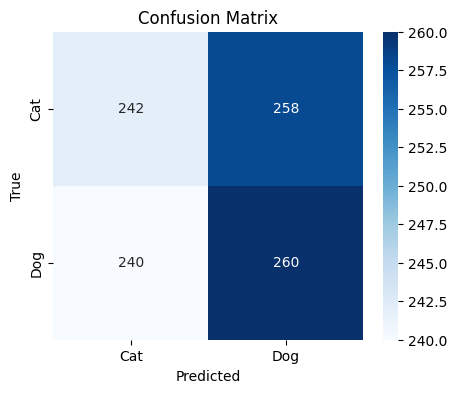

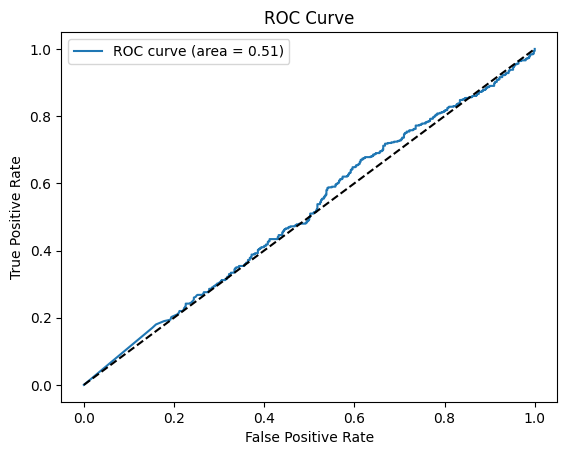

✅ Model Saved!


In [14]:
# ===============================
# STEP 1: Setup & Imports
# ===============================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

print("✅ TensorFlow Version:", tf.__version__)

# ===============================
# STEP 2: Dataset Preparation
# ===============================
# Use TensorFlow's built-in cats vs dogs dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url, extract=True)
base_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Image Data Generators with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32, class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(128,128), batch_size=32, class_mode='binary')

# ===============================
# STEP 3: Build Custom CNN
# ===============================
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
history_cnn = cnn_model.fit(train_generator, epochs=5, validation_data=val_generator)

# ===============================
# STEP 4: Evaluate Custom CNN
# ===============================
# Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title("Accuracy (Custom CNN)")

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss (Custom CNN)")
plt.show()

# ===============================
# STEP 5: Transfer Learning (MobileNetV2)
# ===============================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_transfer = transfer_model.fit(train_generator, epochs=5, validation_data=val_generator)

# ===============================
# STEP 6: Fine-Tuning
# ===============================
base_model.trainable = True
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                       loss='binary_crossentropy', metrics=['accuracy'])
history_finetune = transfer_model.fit(train_generator, epochs=3, validation_data=val_generator)

# ===============================
# STEP 7: Model Evaluation
# ===============================
y_pred_proba = transfer_model.predict(val_generator)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Classification Report:")
print(classification_report(val_generator.classes, y_pred))

# Confusion Matrix
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(); plt.title("ROC Curve")
plt.show()

# ===============================
# STEP 8: Save Model
# ===============================
transfer_model.save("cat_dog_classifier.keras")
print("✅ Model Saved!")


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

print("✅ TensorFlow Version:", tf.__version__)


✅ TensorFlow Version: 2.19.0


In [16]:
import tensorflow as tf
import os
import zipfile

# 1. Download dataset (zip file only)
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url)

# 2. Extract manually
extract_path = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# 3. Define train/validation dirs
train_dir = os.path.join(extract_path, "train")
val_dir = os.path.join(extract_path, "validation")

# 4. Check folders
print("Base Dir:", extract_path)
print("Train Folders:", os.listdir(train_dir))
print("Validation Folders:", os.listdir(val_dir))


Base Dir: /root/.keras/datasets/cats_and_dogs_filtered
Train Folders: ['cats', 'dogs']
Validation Folders: ['cats', 'dogs']


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32, class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(128,128), batch_size=32, class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # Binary classification (Cat vs Dog)
])

# Compile model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train model
history_cnn = cnn_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5173 - loss: 0.7547 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5143 - loss: 0.6881 - val_accuracy: 0.5520 - val_loss: 0.6878
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5198 - loss: 0.6917 - val_accuracy: 0.6000 - val_loss: 0.6864
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5744 - loss: 0.6760 - val_accuracy: 0.5470 - val_loss: 0.6569
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5757 - loss: 0.6660 - val_accuracy: 0.6340 - val_loss: 0.6501


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # Binary classification (Cat vs Dog)
])

# Compile model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train model
history_cnn = cnn_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5132 - loss: 0.6967 - val_accuracy: 0.5760 - val_loss: 0.6760
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5422 - loss: 0.6808 - val_accuracy: 0.6450 - val_loss: 0.6338
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6035 - loss: 0.6587 - val_accuracy: 0.6110 - val_loss: 0.6295
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6006 - loss: 0.6541 - val_accuracy: 0.6480 - val_loss: 0.6114
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6525 - loss: 0.6185 - val_accuracy: 0.6360 - val_loss: 0.6204


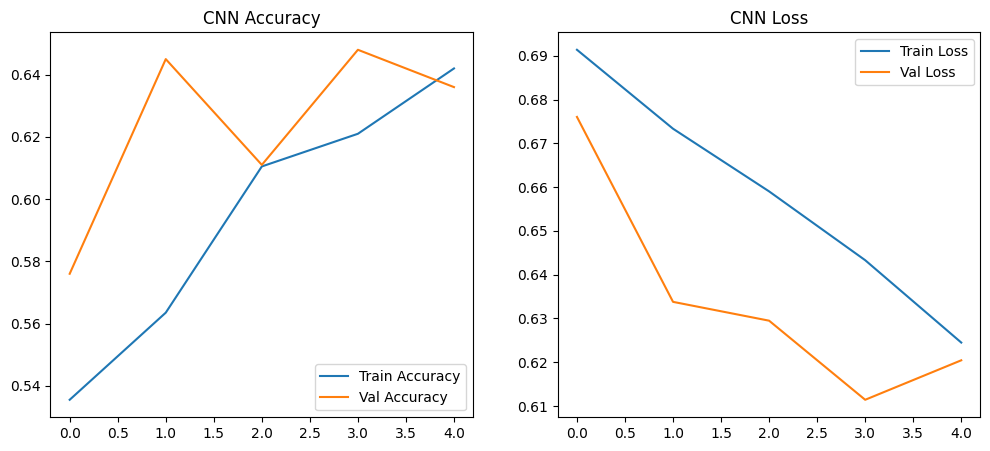

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("CNN Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("CNN Loss")

plt.show()


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load MobileNetV2 base model (pretrained on ImageNet)
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(128,128,3))

base_model.trainable = False   # freeze weights for now

# Build model on top of base
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
transfer_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Train
history_transfer = transfer_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 748ms/step - accuracy: 0.8097 - loss: 0.3886 - val_accuracy: 0.9620 - val_loss: 0.0893
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 632ms/step - accuracy: 0.9213 - loss: 0.2042 - val_accuracy: 0.9650 - val_loss: 0.0827
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 636ms/step - accuracy: 0.9289 - loss: 0.1837 - val_accuracy: 0.9670 - val_loss: 0.0903
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 672ms/step - accuracy: 0.9463 - loss: 0.1332 - val_accuracy: 0.9640 - val_loss: 0.0750
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 629ms/step - accuracy: 0.9458 - loss: 0.1401 - val_accuracy: 0.9660 - val_loss: 0.0730


In [22]:
# Unfreeze the base model
base_model.trainable = True

# Re-compile with smaller learning rate
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Fine-tune training
history_finetune = transfer_model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)


Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.7676 - loss: 0.6430 - val_accuracy: 0.9670 - val_loss: 0.0770
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8905 - loss: 0.2971 - val_accuracy: 0.9720 - val_loss: 0.0686
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9246 - loss: 0.1988 - val_accuracy: 0.9730 - val_loss: 0.0677


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 383ms/step
📊 Classification Report:

              precision    recall  f1-score   support

         Cat       0.48      0.47      0.48       500
         Dog       0.48      0.48      0.48       500

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



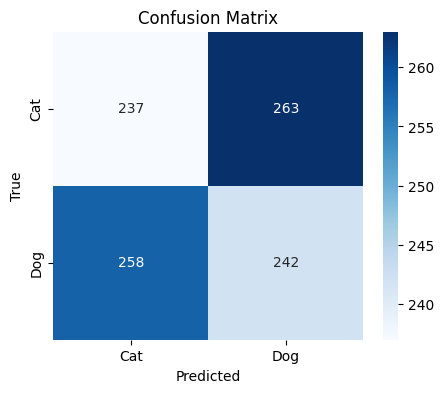

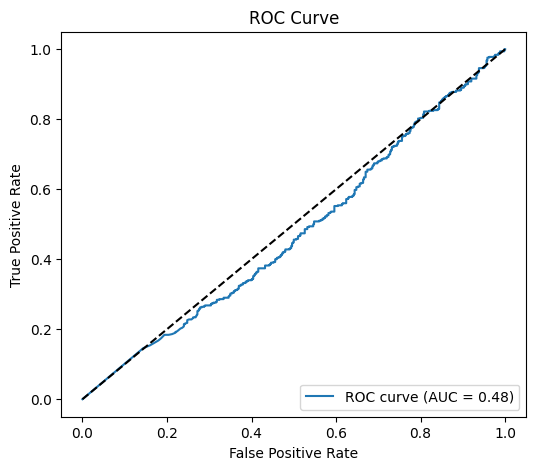

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred_proba = transfer_model.predict(val_generator)   # probabilities
y_pred = (y_pred_proba > 0.5).astype(int)              # convert to 0 or 1

# 📊 Classification Report
print("📊 Classification Report:\n")
print(classification_report(val_generator.classes, y_pred, target_names=['Cat','Dog']))

# 📌 Confusion Matrix
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

# 📌 ROC Curve
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Saving new.jpg to new.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


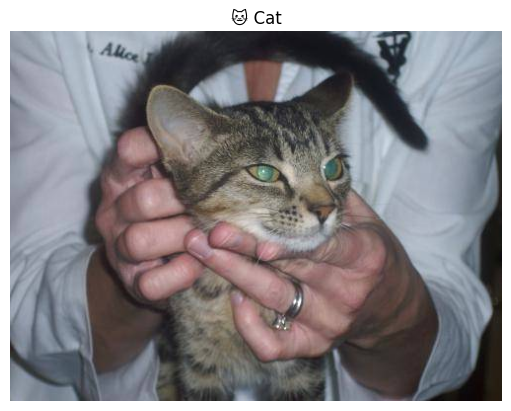

In [26]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

for img_path in uploaded.keys():
    # Load image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Prediction
    prediction = transfer_model.predict(img_array)

    # Show image + result
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title("Prediction: 🐶 Dog" if prediction[0][0] > 0.5 else "🐱 Cat")
    plt.show()
